In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
import time
from datetime import datetime
from config import weather_api_key

In [3]:
# In the next cell, we'll add the code that generates the latitudes and longitudes, but first, they need to be 
# stored so that we can access them later. Since we are creating arrays of latitudes and longitudes, 
# we'll declare each array as a variable.

# In the next cell, add the following code that we used to generate the random latitudes. 
# Also, we'll create a similar code snippet that will generate longitudes. 
# To ensure enough latitudes and longitudes, we'll start with 1,500. In addition, we'll pack the 
# latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function.

# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. 
# If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, 
# where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

In [5]:
# Create a list for holding the cities.

cities = []
coordinates = list(lat_lngs)

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

# If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.

len(cities)

620

In [6]:
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nikolskoye
Processing Record 2 of Set 1 | faanui
Processing Record 3 of Set 1 | nishihara
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | hualmay
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | barcelos
Processing Record 8 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 9 of Set 1 | semnan
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | port blair
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | castro
Processing Record 14 of Set 1 | khatanga
Processing Record 15 of Set 1 | vardo
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | cockburn harbour
City not found. Skipping...
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | ahipara
Processing Record 20 of Set 1 | cherskiy
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Se

Processing Record 41 of Set 4 | srednekolymsk
Processing Record 42 of Set 4 | grindavik
Processing Record 43 of Set 4 | zomin
Processing Record 44 of Set 4 | skalistyy
City not found. Skipping...
Processing Record 45 of Set 4 | bluff
Processing Record 46 of Set 4 | saint-philippe
Processing Record 47 of Set 4 | airai
Processing Record 48 of Set 4 | alta floresta
Processing Record 49 of Set 4 | buala
Processing Record 50 of Set 4 | ishigaki
Processing Record 1 of Set 5 | shunyi
Processing Record 2 of Set 5 | port macquarie
Processing Record 3 of Set 5 | samarai
Processing Record 4 of Set 5 | coolum beach
Processing Record 5 of Set 5 | karauzyak
City not found. Skipping...
Processing Record 6 of Set 5 | mezen
Processing Record 7 of Set 5 | juba
Processing Record 8 of Set 5 | whitehorse
Processing Record 9 of Set 5 | pevek
Processing Record 10 of Set 5 | el alto
Processing Record 11 of Set 5 | mehamn
Processing Record 12 of Set 5 | knysna
Processing Record 13 of Set 5 | spirit river
Proce

Processing Record 26 of Set 8 | vila velha
Processing Record 27 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 28 of Set 8 | necochea
Processing Record 29 of Set 8 | saint-francois
Processing Record 30 of Set 8 | muros
Processing Record 31 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 32 of Set 8 | goderich
Processing Record 33 of Set 8 | ngaoundere
Processing Record 34 of Set 8 | big rapids
Processing Record 35 of Set 8 | lima
Processing Record 36 of Set 8 | coihaique
Processing Record 37 of Set 8 | sambava
Processing Record 38 of Set 8 | esperance
Processing Record 39 of Set 8 | norman wells
Processing Record 40 of Set 8 | coquimbo
Processing Record 41 of Set 8 | ponta delgada
Processing Record 42 of Set 8 | noyabrsk
Processing Record 43 of Set 8 | beringovskiy
Processing Record 44 of Set 8 | achisay
City not found. Skipping...
Processing Record 45 of Set 8 | narsaq
Processing Record 46 of Set 8 | buraydah
Processing Record 47 of Set 8 | lalm

Processing Record 15 of Set 12 | isangel
Processing Record 16 of Set 12 | katangli
Processing Record 17 of Set 12 | baoding
Processing Record 18 of Set 12 | bend
Processing Record 19 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 20 of Set 12 | prado
Processing Record 21 of Set 12 | achinsk
Processing Record 22 of Set 12 | klaksvik
Processing Record 23 of Set 12 | dudinka
Processing Record 24 of Set 12 | charters towers
Processing Record 25 of Set 12 | florianopolis
Processing Record 26 of Set 12 | egvekinot
Processing Record 27 of Set 12 | ibra
Processing Record 28 of Set 12 | acton
Processing Record 29 of Set 12 | ormara
Processing Record 30 of Set 12 | blind river
Processing Record 31 of Set 12 | aquiraz
Processing Record 32 of Set 12 | raahe
Processing Record 33 of Set 12 | tynda
Processing Record 34 of Set 12 | svetlogorsk
Processing Record 35 of Set 12 | barreirinha
Processing Record 36 of Set 12 | rumes
Processing Record 37 of Set 12 | ardesen
Processing Re

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolskoye,59.7035,30.7861,53.87,91,100,8.03,RU,2022-09-15 00:00:02
1,Faanui,-16.4833,-151.7500,78.35,71,46,21.56,PF,2022-09-15 00:00:03
2,Nishihara,26.1842,127.7558,80.65,88,75,11.50,JP,2022-09-15 00:00:03
3,Rikitea,-23.1203,-134.9692,70.93,73,8,13.51,PF,2022-09-15 00:00:07
4,Hualmay,-11.0964,-77.6139,61.27,82,38,7.70,PE,2022-09-15 00:00:08
5,Cape Town,-33.9258,18.4232,63.37,81,83,10.00,ZA,2022-09-15 00:00:09
6,Barcelos,41.5388,-8.6151,68.85,94,100,7.05,PT,2022-09-15 00:00:10
7,Semnan,35.5729,53.3971,76.06,21,17,5.44,IR,2022-09-15 00:00:11
8,Barrow,71.2906,-156.7887,34.52,94,100,25.39,US,2022-09-15 00:00:12
9,Port Blair,11.6667,92.7500,79.03,82,100,9.80,IN,2022-09-15 00:00:12


In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

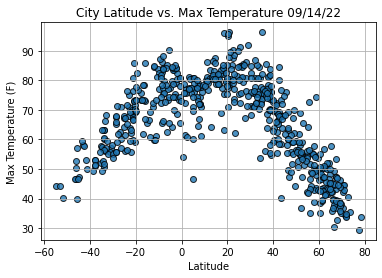

In [25]:
# Import time module
# import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.jpeg")

# Show plot.
plt.show()


In [19]:
# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


<Figure size 432x288 with 0 Axes>

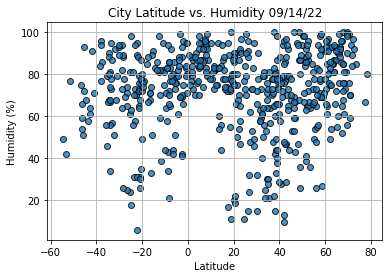

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.jpeg")
# Show plot.
plt.show()

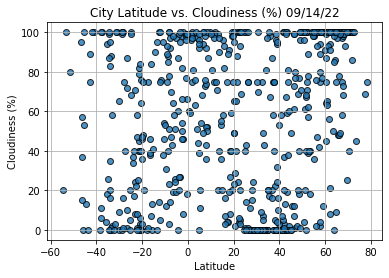

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.jpeg")
# Show plot.
plt.show()

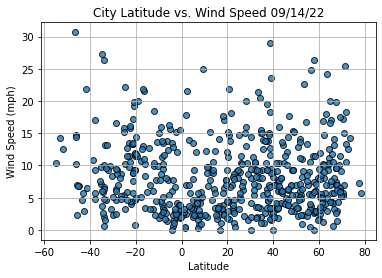

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.jpeg")
# Show plot.
plt.show()